# **Wine Classification**

20240166 Seoyeon Shim

20240203 Hajin Kim

# **1. Prepare and Check Dataset**

In order to analyze the dataset more easily, we use google Colab and google Drive to utilize many great data mining libraries. To do so, we have to mount google drive and load the dataset from our google shared folder.

In [22]:
from google.colab import drive
drive.mount('/content/drive')
!pip install gdown #To load the dataset from the google shared directory
#We mount the google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We prepared wine data set. We'll classify the type of the wine according to some standards in our dataset. So our goal is making great classification for this system to make great prediction about the wine type!

In [23]:
file_ID = '1XPBHVv1A-OrstnPq9cZlwoJL0DPZDbx6' #I get the ID from the shared link of the file
file_name = 'wine_classification.csv'

!gdown --id $file_ID -O $file_name
#This is our dataset to be classified

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XPBHVv1A-OrstnPq9cZlwoJL0DPZDbx6
To: /content/wine_classification.csv
100% 390k/390k [00:00<00:00, 14.0MB/s]


In [24]:
import pandas as pd

dataset = pd.read_csv('wine_classification.csv', na_values = ["NaN"]) #Load Dataset
#In this dataset, missing values are written as string "NaN"
dataset.columns = ['Type', 'Fixed Acitidy', 'Volatile Acidity', 'Citric Acid',\
                   'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide',\
                   'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', \
                   'Alcohol', 'Quality']

print('Number of instances = ', dataset.shape[0])
print('Number of attributes = ', dataset.shape[1])
print()
print(dataset.head())
print()
print(dataset.dtypes)


Number of instances =  6497
Number of attributes =  13

    Type  Fixed Acitidy  Volatile Acidity  Citric Acid  Residual Sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             NaN   
4  white            7.2              0.23         0.32             8.5   

   Chlorides  Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0      NaN  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   Sulphates  Alcohol  Quality  
0       0.45      8.8

There are some missing values, which is the form of string "NaN". So we processed string "NaN" values for pandas to recognzie it as missing value.
Plus, types of all data in every column are perfectly matched in the process of loading

# **2. Preprocessing Dataset**

## 1) Processing Missing Value

In [25]:
#We'll check how many missing values in each column

print('Number of instances = ', dataset.shape[0])
print('Number of attributes = ', dataset.shape[1])
print()

print('Number of Missing Values :')
for att in dataset.columns:
  print("--", att, " => ", dataset[att].isna().sum())

Number of instances =  6497
Number of attributes =  13

Number of Missing Values :
-- Type  =>  0
-- Fixed Acitidy  =>  0
-- Volatile Acidity  =>  5
-- Citric Acid  =>  4
-- Residual Sugar  =>  5
-- Chlorides  =>  4
-- Free Sulfur Dioxide  =>  4
-- Total Sulfur Dioxide  =>  9
-- Density  =>  6
-- pH  =>  5
-- Sulphates  =>  3
-- Alcohol  =>  4
-- Quality  =>  2


In [26]:
print('Number of instances before cleaning = ', dataset.shape[0])

data = dataset.dropna()
#Delete all rows included NaN

data = data.reset_index(drop=True)
#Reset index
print(data)

print('Number of instances after cleaning = ', data.shape[0])
print('Number of Missing Values :')
for att in data.columns:
  print("--", att, " => ", data[att].isna().sum())

Number of instances before cleaning =  6497
       Type  Fixed Acitidy  Volatile Acidity  Citric Acid  Residual Sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            8.1             0.280         0.40             6.9   
2     white            7.2             0.230         0.32             8.5   
3     white            8.1             0.280         0.40             6.9   
4     white            7.0             0.270         0.36            20.7   
...     ...            ...               ...          ...             ...   
6441    red            6.3             0.510         0.13             2.3   
6442    red            6.2             0.600         0.08             2.0   
6443    red            6.3             0.510         0.13             2.3   
6444    red            5.9             0.645         0.12             2.0   
6445    red            6.0             0.310         0.47             3.6   

      Chlorides  Free Sulfur Di

We can see there's no missing value anymore after cleaning by seeing the result!

## 2) Outliers

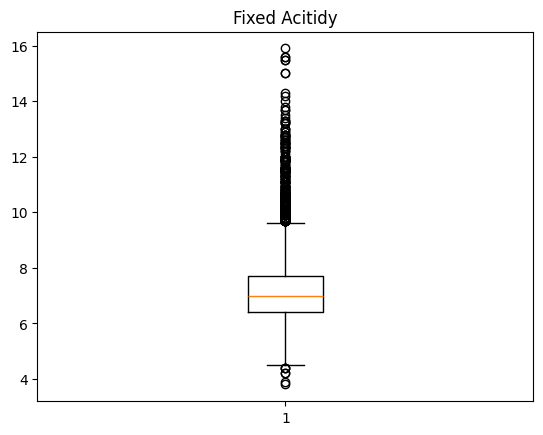

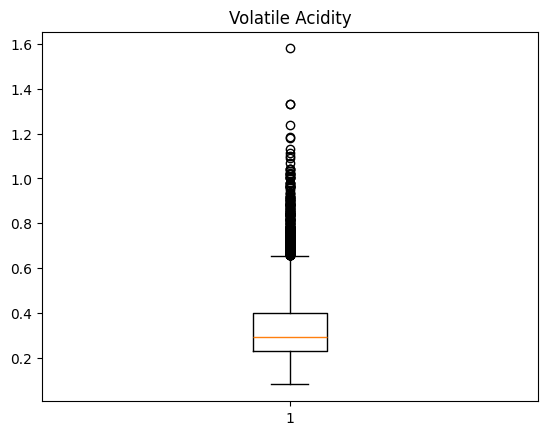

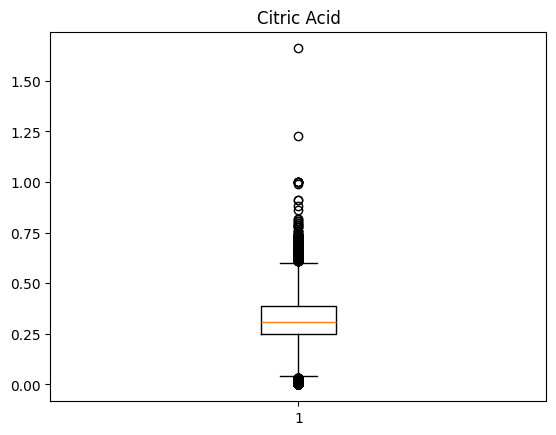

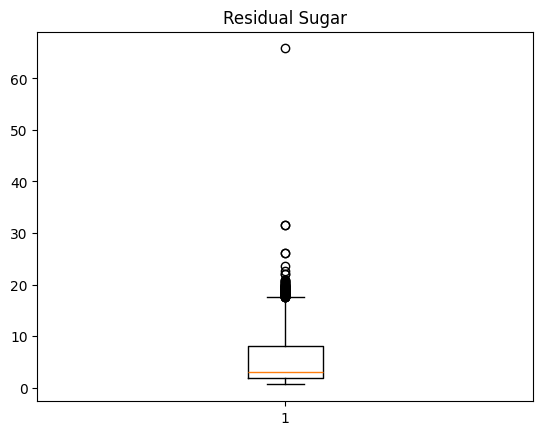

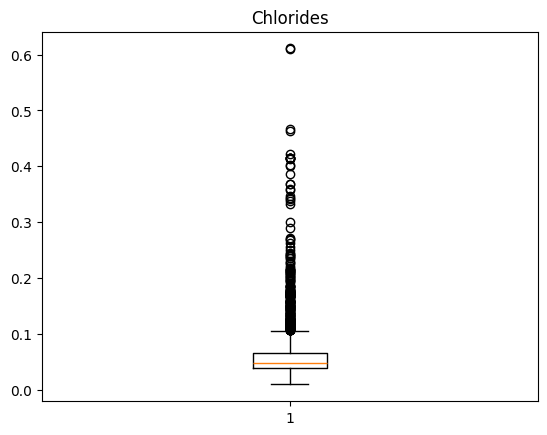

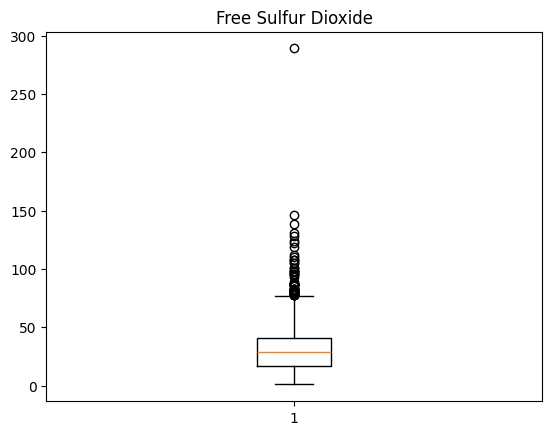

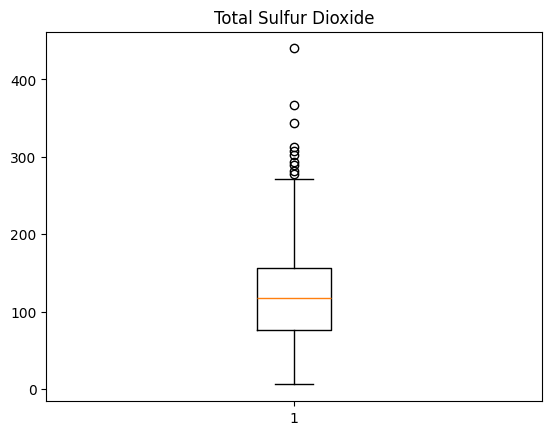

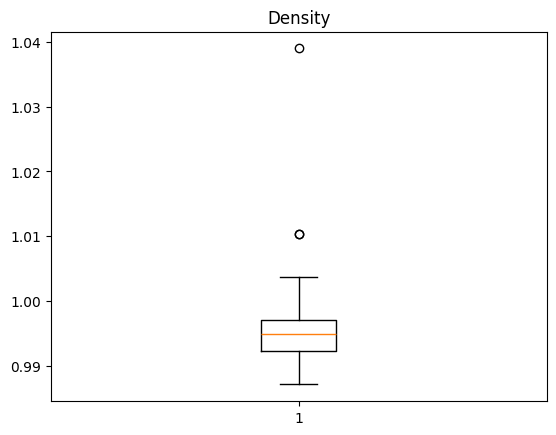

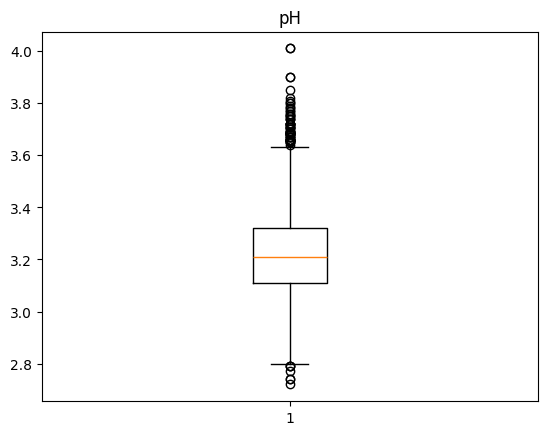

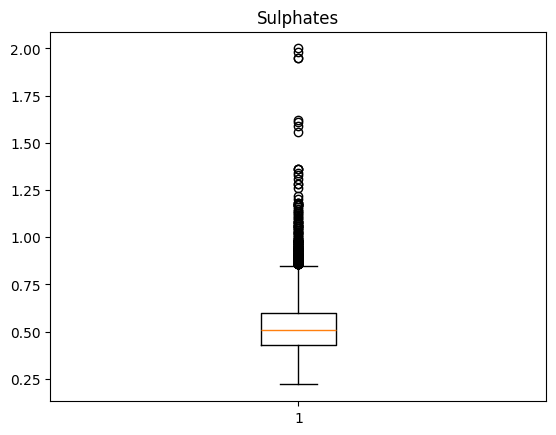

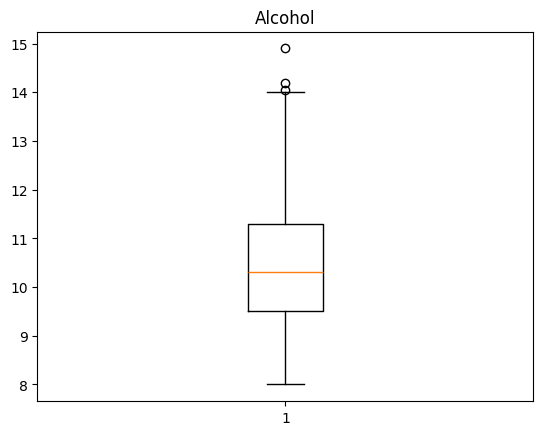

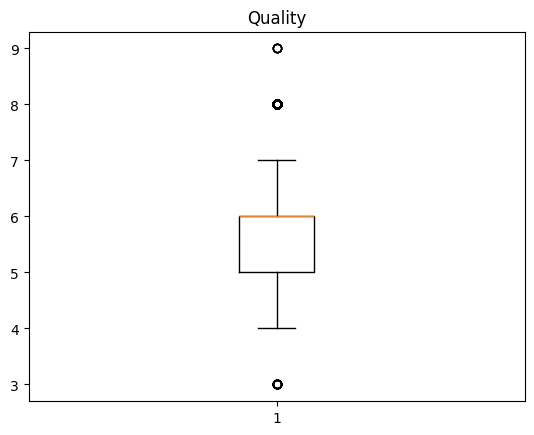

In [27]:
#Let's check boxplot to get some informations about outliers
import matplotlib.pyplot as plt

data_num = data.drop(['Type'], axis=1)

for column in data_num.columns:
    plt.figure()
    plt.boxplot(pd.DataFrame(data_num[column]))
    plt.title(column)
    plt.show()

We can see that there are some outliers. So we'll normalize with Z-Score the data and we'll only remain non-outlier data.

      Fixed Acitidy  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0         -0.166259         -0.422079     0.285719        3.201863  -0.313959   
1          0.683228         -0.361395     0.560924        0.305117  -0.171315   
2         -0.011807         -0.664813     0.010513        0.640972   0.056916   
3          0.683228         -0.361395     0.560924        0.305117  -0.171315   
4         -0.166259         -0.422079     0.285719        3.201863  -0.313959   
...             ...               ...          ...             ...        ...   
6441      -0.706842          1.034328    -1.296712       -0.660465   0.570435   
6442      -0.784068          1.580480    -1.640718       -0.723437   0.969839   
6443      -0.706842          1.034328    -1.296712       -0.660465   0.570435   
6444      -1.015746          1.853556    -1.365513       -0.723437   0.541906   
6445      -0.938520         -0.179344     1.042533       -0.387583   0.313676   

      Free Sulfur Dioxide  

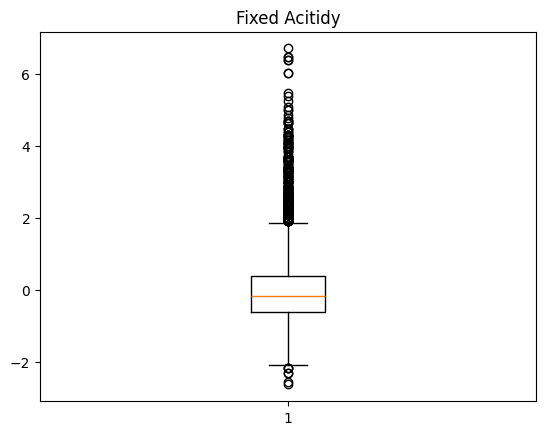

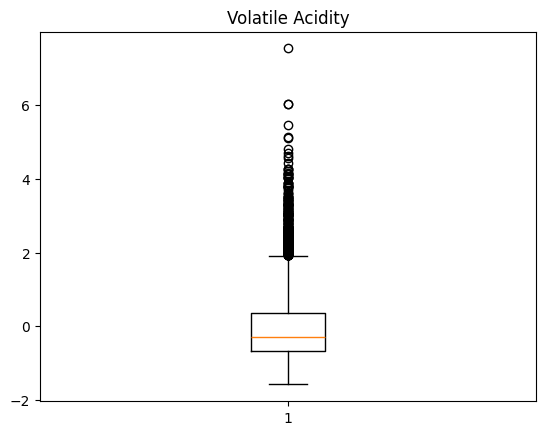

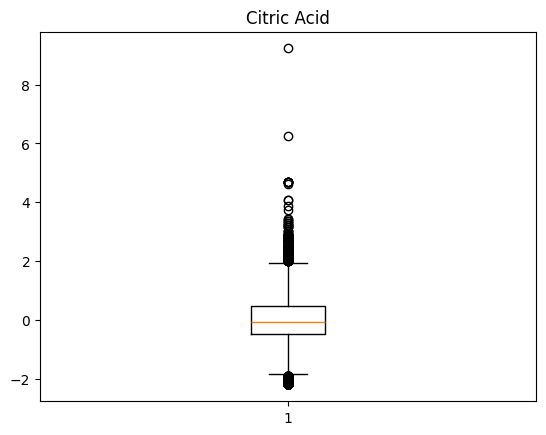

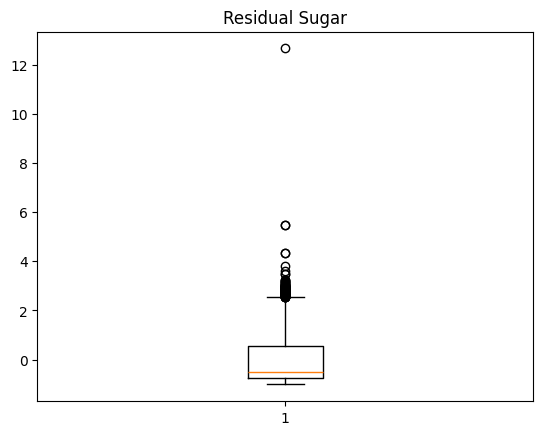

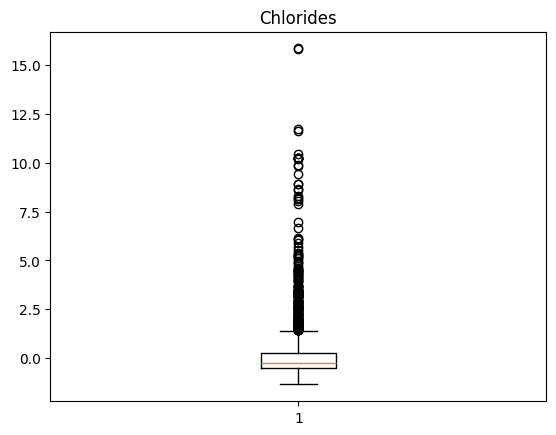

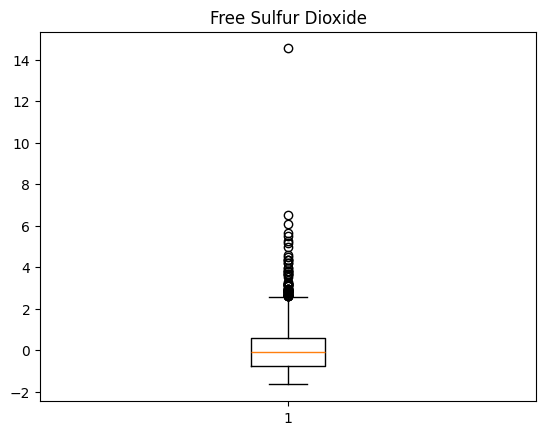

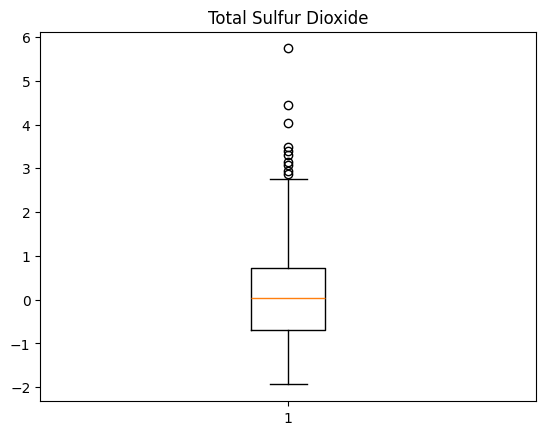

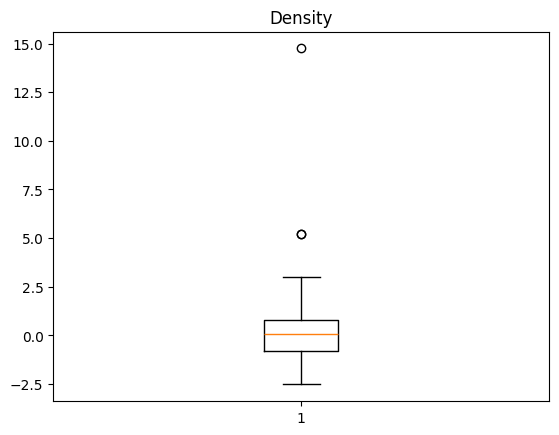

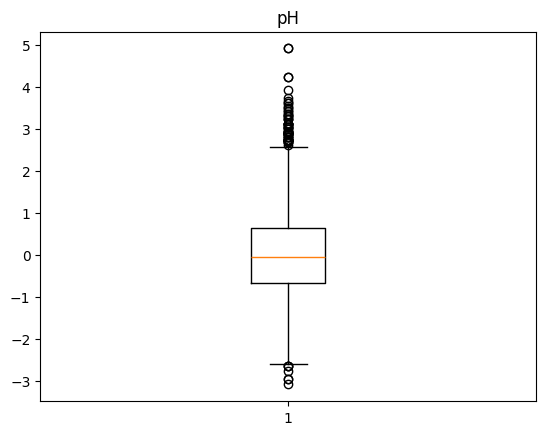

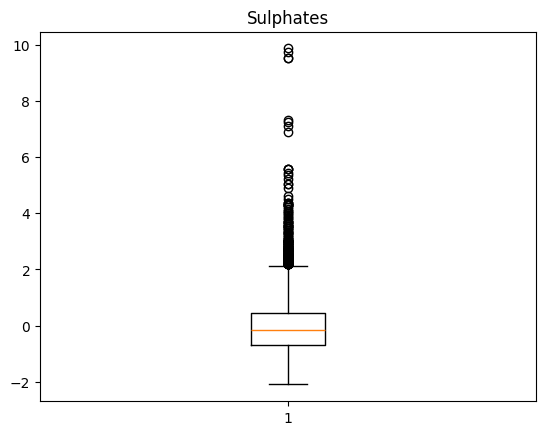

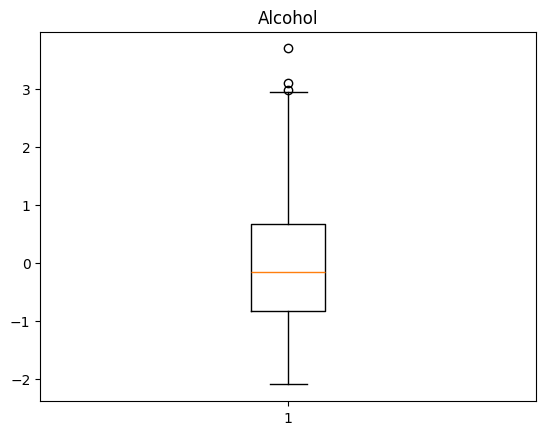

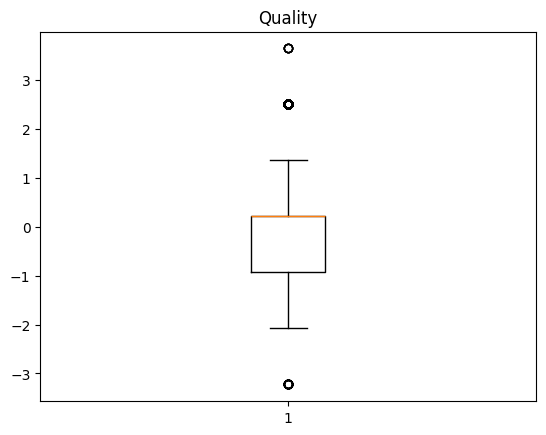

In [28]:
#Calculate Z-Score
data_z = (data_num - data_num.mean()) / data_num.std()
print(data_z)

#Show the distribution of Z-Score
for column in data_z.columns:
    plt.figure()
    plt.boxplot(pd.DataFrame(data_z[column]))
    plt.title(column)
    plt.show()

There are some outliers after normalizing, too! We'll remove it in our data!

In [29]:
for column in data_z.columns:
  column_name = 'z_' + column
  data[column_name] = data_z[column] #make new column in 'data' Data Frame
  data = data.loc[data[column_name] >= -3]
  data = data.loc[data[column_name] <= 3]
  data = data.drop([column_name], axis=1)

data = data.reset_index()
data = data.drop(['index'], axis=1)
print('Number of instances after removing outlier = ', data.shape[0])
print(data)

Number of instances after removing outlier =  5934
       Type  Fixed Acitidy  Volatile Acidity  Citric Acid  Residual Sugar  \
0     white            8.1             0.280         0.40            6.90   
1     white            7.2             0.230         0.32            8.50   
2     white            8.1             0.280         0.40            6.90   
3     white            6.3             0.300         0.34            1.60   
4     white            8.1             0.270         0.41            1.45   
...     ...            ...               ...          ...             ...   
5929    red            6.3             0.510         0.13            2.30   
5930    red            6.2             0.600         0.08            2.00   
5931    red            6.3             0.510         0.13            2.30   
5932    red            5.9             0.645         0.12            2.00   
5933    red            6.0             0.310         0.47            3.60   

      Chlorides  Free Su

##3) Duplicated Data

In [30]:
dups = data.duplicated()
print("Number of duplicated row : ", dups.sum())

Number of duplicated row :  1096



There are 943 duplicated rows in our data

In [31]:
print("Number of instanced before removing duplicated data: ", data.shape[0])
data1 = data.drop_duplicates()
data1 = data1.reset_index()
print("Number of instanced after removing duplicated data: ", data1.shape[0])

Number of instanced before removing duplicated data:  5934
Number of instanced after removing duplicated data:  4838




## 4) Replace String Data to Int



In [32]:
data1['Type'] = data1['Type'].replace({'white': 1, 'red': 2})
data1 = data1.drop(['index'], axis=1)
print(data1)

      Type  Fixed Acitidy  Volatile Acidity  Citric Acid  Residual Sugar  \
0        1            8.1             0.280         0.40            6.90   
1        1            7.2             0.230         0.32            8.50   
2        1            6.3             0.300         0.34            1.60   
3        1            8.1             0.270         0.41            1.45   
4        1            8.6             0.230         0.40            4.20   
...    ...            ...               ...          ...             ...   
4833     2            5.4             0.740         0.09            1.70   
4834     2            6.3             0.510         0.13            2.30   
4835     2            6.2             0.600         0.08            2.00   
4836     2            5.9             0.645         0.12            2.00   
4837     2            6.0             0.310         0.47            3.60   

      Chlorides  Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  \
0         

<ipython-input-32-5e0e54ce20fe>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1['Type'] = data1['Type'].replace({'white': 1, 'red': 2})


# **3.Correlation Plot**

Now we should analyze correalation plot to see the high-corrleated column sets

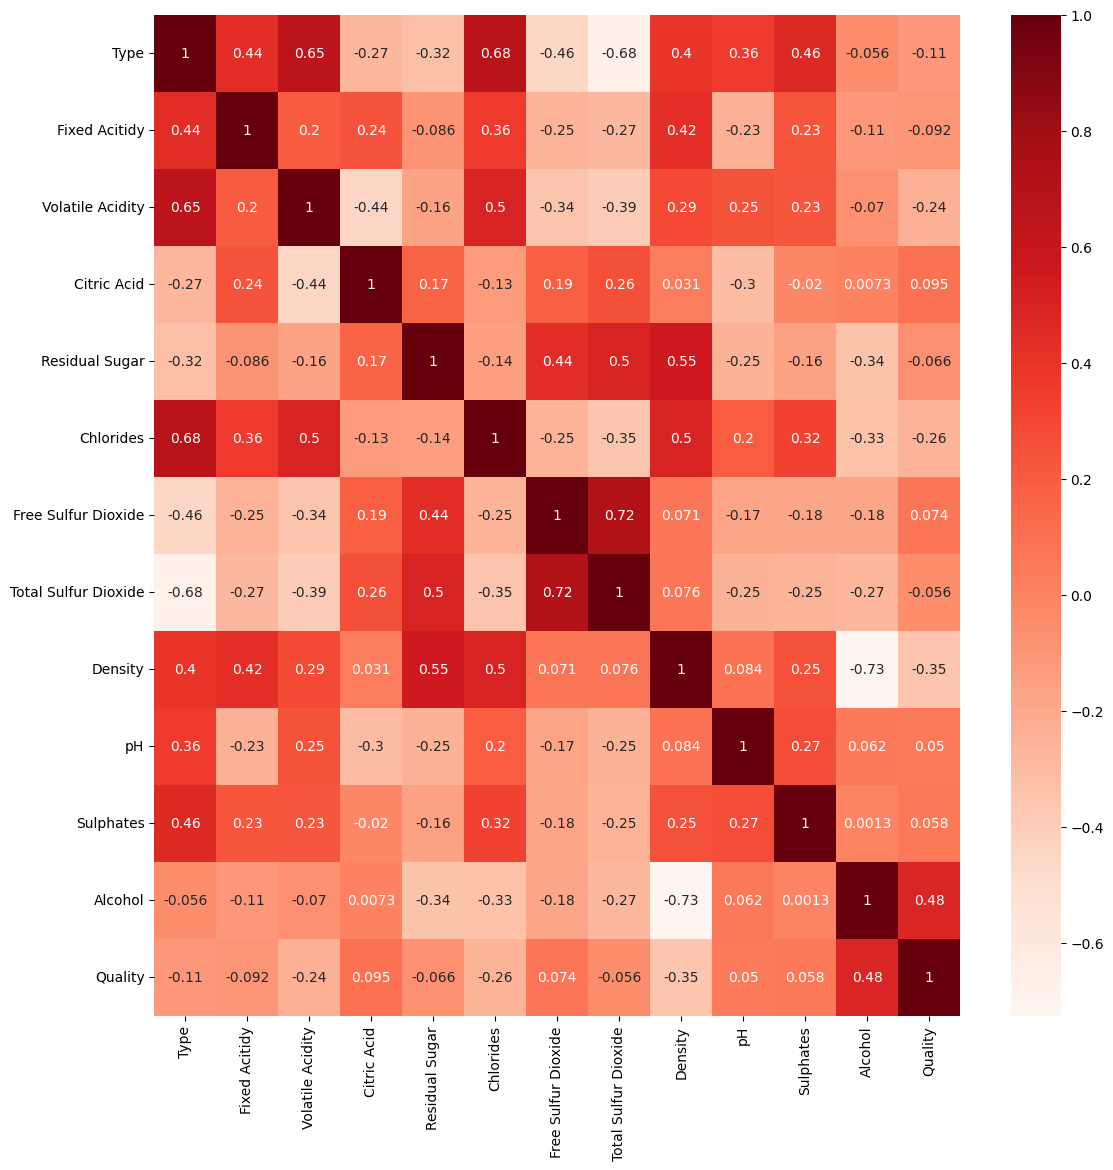

In [33]:
import seaborn as sns

plt.figure(figsize=(13,13))
sns.heatmap(data1.corr(),annot = True, cmap = 'Reds')
plt.show()

Because we'll predict the type of the wine with classification, we'll choose the columns which satisfies |Correlation Coefficient|>=0.4 in the classification process: *Fixed Acidity, Volatile Acitidy, Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide, Sulphates*

In [34]:
#I removed columns which I don't need now
data2 = data1.drop(columns = ['Citric Acid', 'Residual Sugar', 'Density', 'pH',\
                              'Alcohol', 'Quality'])
print(data2)

      Type  Fixed Acitidy  Volatile Acidity  Chlorides  Free Sulfur Dioxide  \
0        1            8.1             0.280      0.050                 30.0   
1        1            7.2             0.230      0.058                 47.0   
2        1            6.3             0.300      0.049                 14.0   
3        1            8.1             0.270      0.033                 11.0   
4        1            8.6             0.230      0.035                 17.0   
...    ...            ...               ...        ...                  ...   
4833     2            5.4             0.740      0.089                 16.0   
4834     2            6.3             0.510      0.076                 29.0   
4835     2            6.2             0.600      0.090                 32.0   
4836     2            5.9             0.645      0.075                 32.0   
4837     2            6.0             0.310      0.067                 18.0   

      Total Sulfur Dioxide  Sulphates  
0          

# **4. Classify**

## 1) Decision Tree Classifier

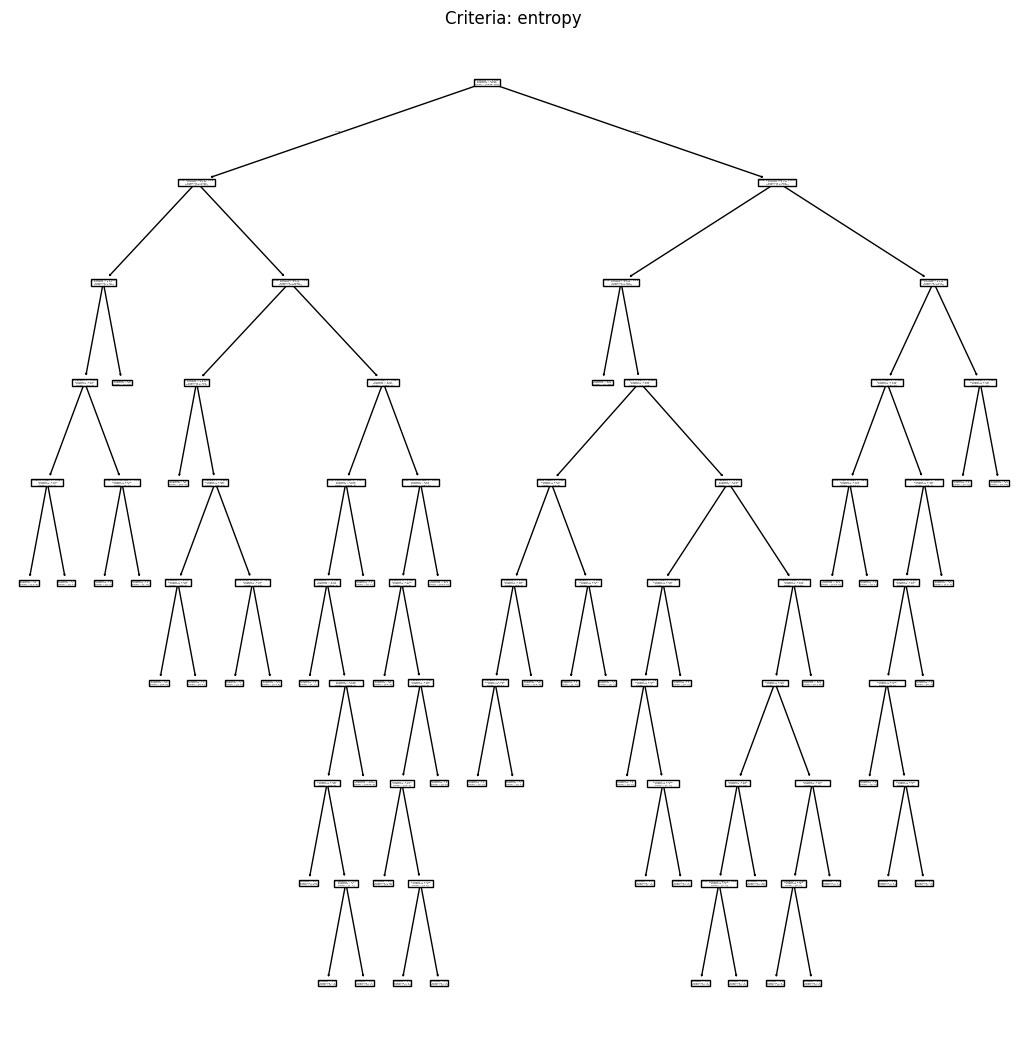

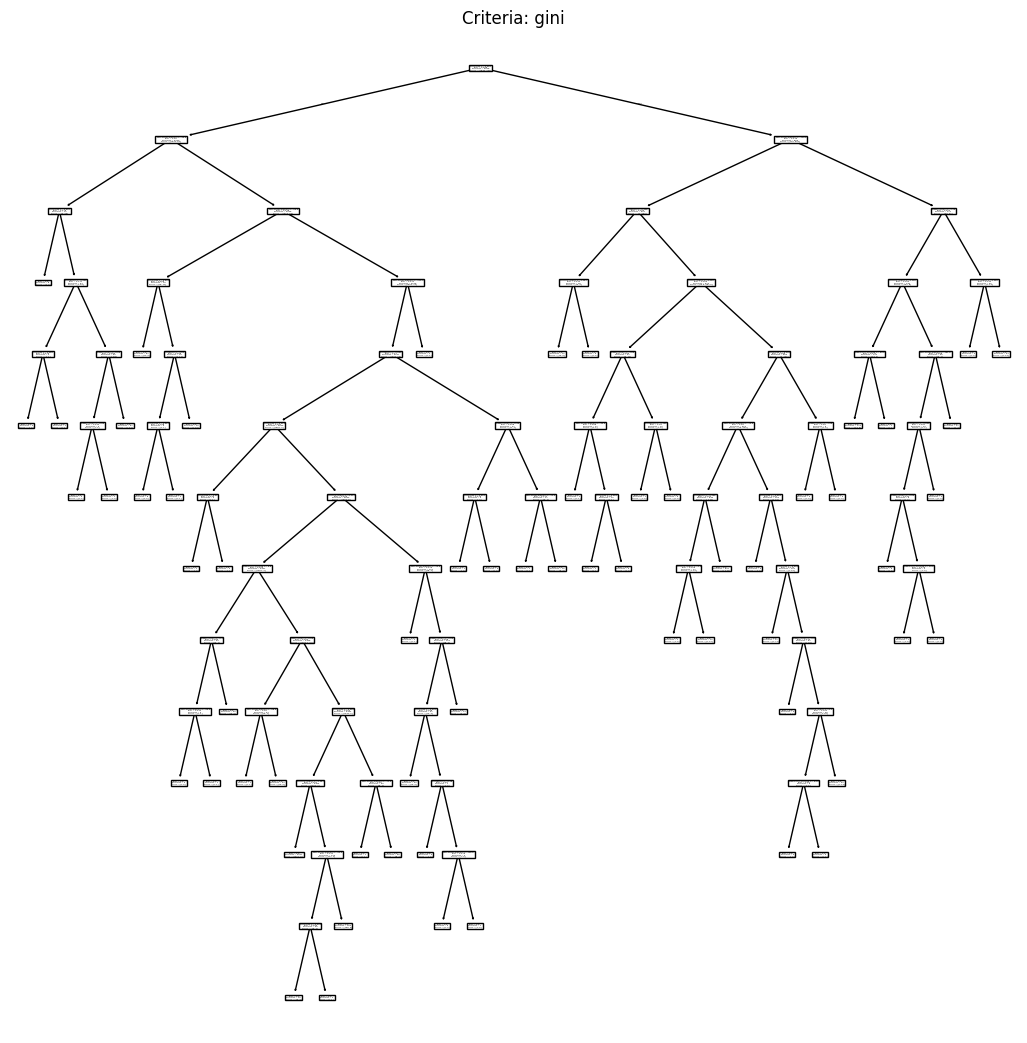

In [39]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X = data2.drop(['Type'], axis=1)
Y = data2['Type'] #Target Data

x_train, x_test, y_train, y_test = train_test_split(X, Y)
#Split training data and testing data in appropriate ratio

#Decision Tree Classifier (Criteria : Entropy)
tree_clf1 = tree.DecisionTreeClassifier(criterion = 'entropy')
tree_clf1 = tree_clf1.fit(x_train, y_train)

plt.figure(figsize = (13,13))
tree.plot_tree(tree_clf1, feature_names = X.columns)
plt.title("Criteria: entropy")
plt.show()

#Decision Tree Classifier (Criteria : Gini)
tree_clf2 = tree.DecisionTreeClassifier(criterion = 'gini')
tree_clf2 = tree_clf2.fit(x_train, y_train)

plt.figure(figsize = (13,13))
tree.plot_tree(tree_clf2, feature_names = X.columns)
plt.title("Criteria: gini")
plt.show()

As you can see above, we splited our data with X(attributes which influenced to the prediction) and Y(target of the prediction). And we also splited our data with Train data and Test data of X and Y.
After that, we made our decision tree classifier with 3 crieria : Entropy and Gini. Because the depth of each classifier are too deep(because there are too many attributes for analysis), we can't see the decision tree well. So we'll see it below with great graphics. (We coudln't make classifier with the criteria of 'log_loss' because log loss wasn't applied in this jupyter notebook..)

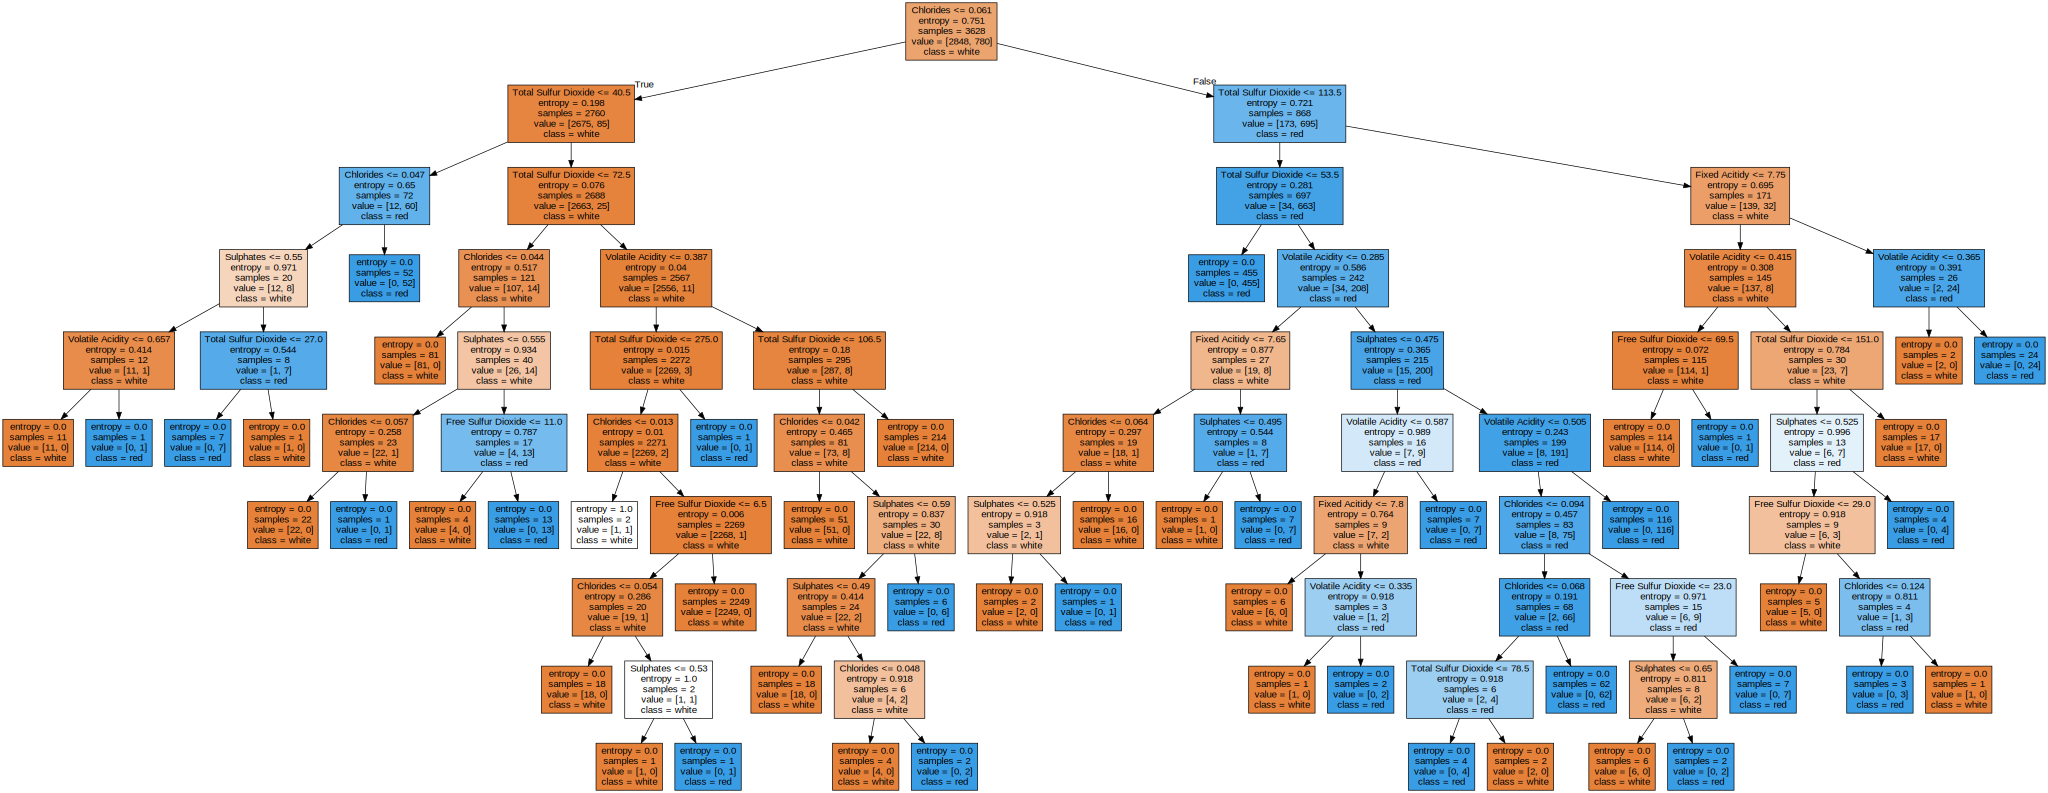

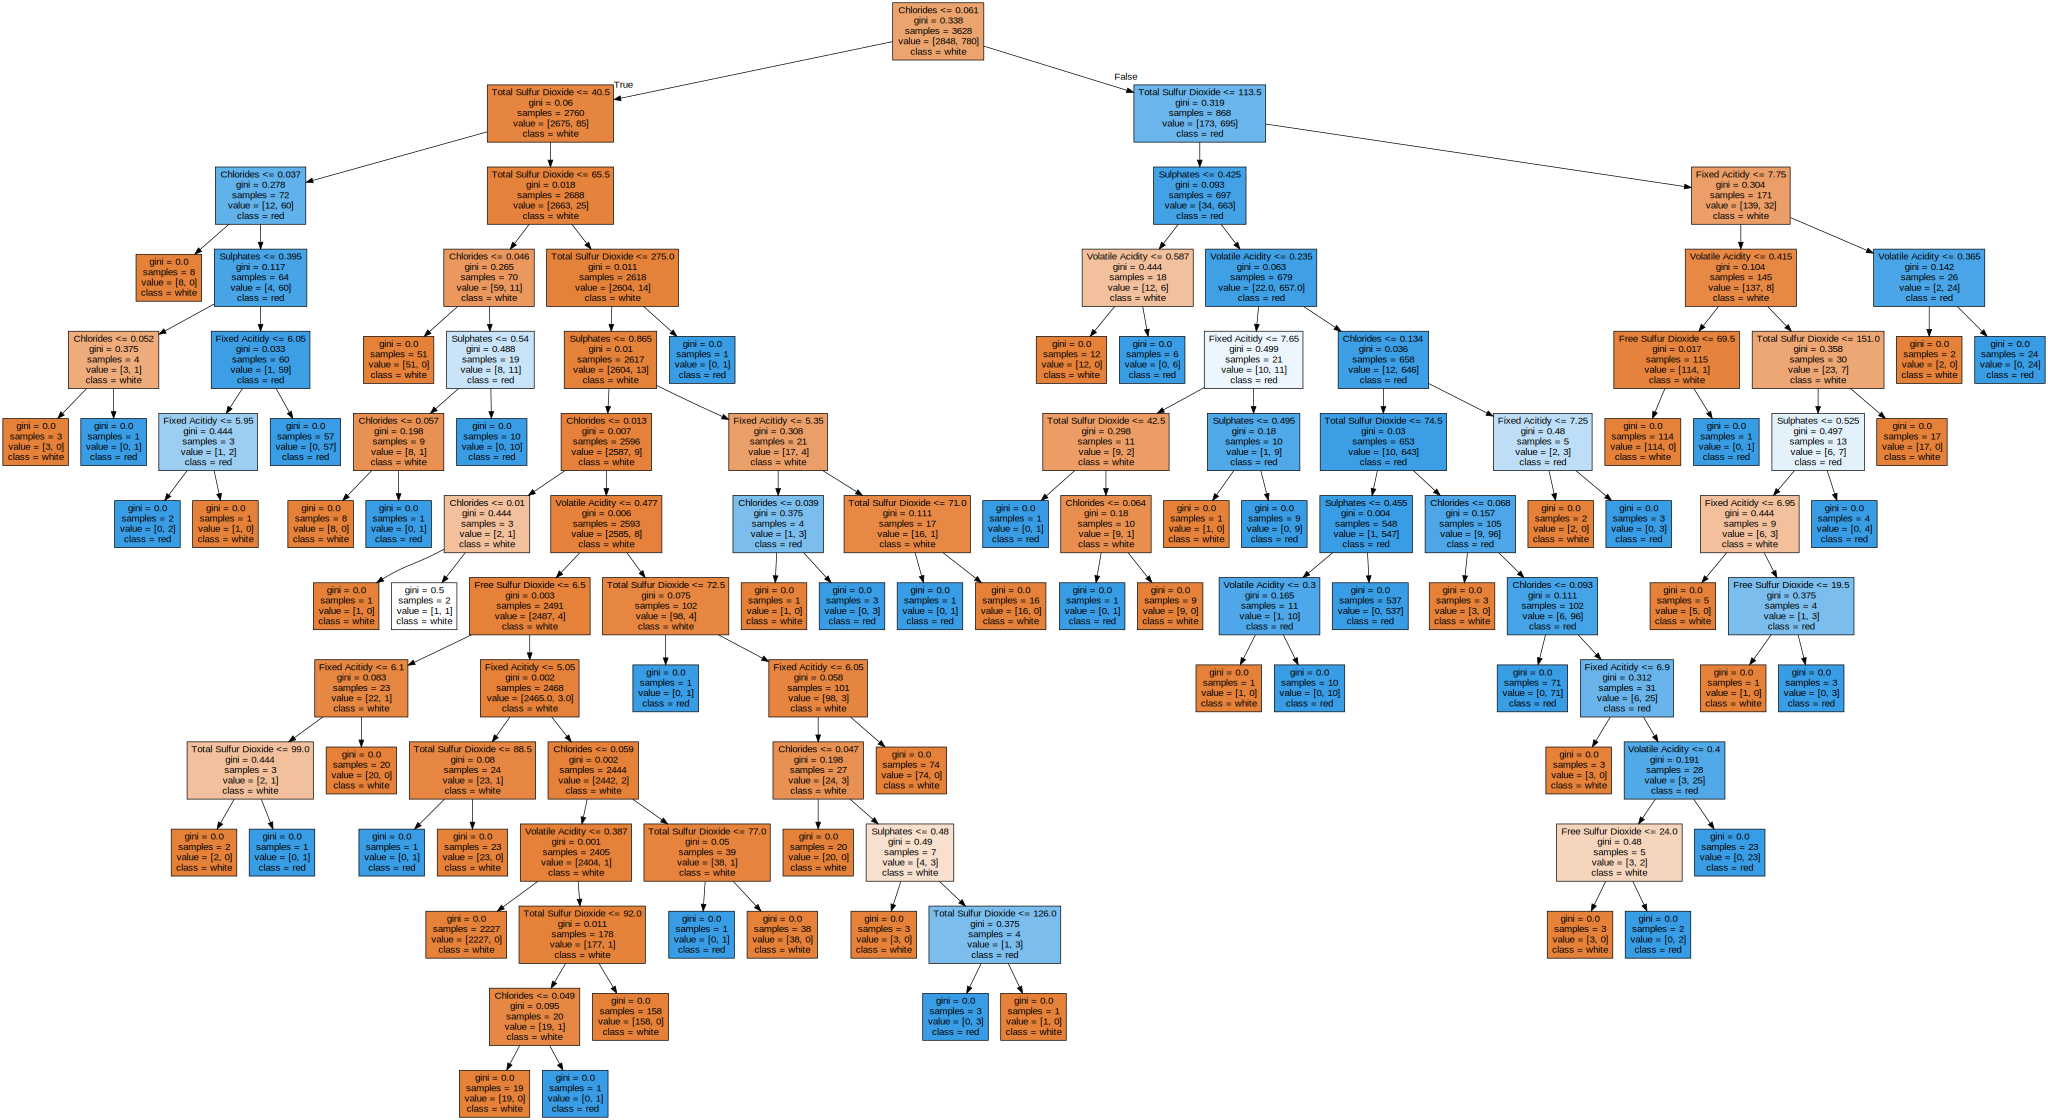

In [40]:
import pydotplus, graphviz
from IPython.display import Image

#Criteria : Entropy
drawing1 = tree.export_graphviz(tree_clf1, feature_names=X.columns, class_names=['white', 'red'], filled=True,
                                out_file=None)
graph1 = graphviz.Source(drawing1)

#Criteria : Gini
drawing2 = tree.export_graphviz(tree_clf2, feature_names=X.columns, class_names=['white', 'red'], filled=True,
                                out_file=None)
graph2 = graphviz.Source(drawing2)

display(graph1)
display(graph2)

In [41]:
from sklearn.metrics import accuracy_score

pred1 = tree_clf1.predict(x_test)
print("Accuracy Score of Entropy classifier: ", accuracy_score(y_test, pred1)*100, "%")

pred2 = tree_clf2.predict(x_test)
print("Accuracy Score of Gini classifier: ", accuracy_score(y_test, pred2)*100, "%")

Accuracy Score of Entropy classifier:  98.34710743801654 %
Accuracy Score of Gini classifier:  98.26446280991735 %


As you can see above, the accuracy score of each classifier is quite high!
Because I concerned some overfitting problem, I tested accuracy score again by reducing max_depth as 5. And the accuracy score was still above 97%!

## 2) Ensemble Classifiers

In [42]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

num_of_base = 200 #the number of Decision Trees each model generates
maxi_depth = 5

#Ensemble with Random Forest Classifier
rfc_clf = ensemble.RandomForestClassifier(n_estimators = num_of_base)
rfc_clf.fit(x_train, y_train)
pred_rfc = rfc_clf.predict(x_test)
print("Accuracy Score of Random Forest Classifier: ", accuracy_score(y_test, pred_rfc)*100, "%")

#Ensemble with Bagging Classifier
bg_clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxi_depth)\
                                    ,n_estimators = num_of_base)
bg_clf.fit(x_train, y_train)
pred_bg = bg_clf.predict(x_test)
print("Accuracy Score of Bagging Classifier: ", accuracy_score(y_test, pred_bg)*100, "%")

#Ensemble with Adaboost Classifier
ada_clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxi_depth)\
                                    ,n_estimators = num_of_base, algorithm="SAMME")
ada_clf.fit(x_train, y_train)
pred_ada = ada_clf.predict(x_test)
print("Accuracy Score of Adaboost Classifier Classifier: ", accuracy_score(y_test, pred_ada)*100, "%")


Accuracy Score of Random Forest Classifier:  98.84297520661157 %
Accuracy Score of Bagging Classifier:  98.09917355371901 %
Accuracy Score of Adaboost Classifier Classifier:  98.92561983471074 %


In this section, we made some ensemble models which we can use with Decision Tree Classifier and test the prediction accuracy: Random Forest Classifier, Bagging Classifier, and Adaboost Classifier.
We set the number of base decision trees as 200, and the maximum depth of each decision tree as 5. In upper section, we can get the accuracy value which is about 97% when the maximum depth was 5.

So, in the same condition, we can see that using ensemble methods shows greater accuracy than using only a decision tree method. And the accuracy is high in the order of Adaboost Classifier > Random Forest Classifier > Bagging Classifier. (But the differences between them are so small!).

#**5. Summary**

In this project, we could know that there are some factors which make us distinguish between white wine and red wine! The factors are these things : Fixed Acidity, Volatile Acitidy, Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide, Sulphates.

With these features, we use Decision Tree Classification to classify basically. And the accuracy score was high, approximately 98%! And in the standard of the maximum depth as 5, we could see ensemble methods makes accuracy greater than using one decision tree alone!

We thinks the reason why accuracies of these classifiers are so high is we select great features which are highly related to the type of the wine in our data preprocessing process!